# AR model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time
from pandas import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

# Ice cream Production Data

In [3]:
def parser(s):
    return datetime.strptime(s, "%Y-%m-%d")

In [4]:
ice_cream_df = pd.read_csv("ice_cream.csv",parse_dates=[0],index_col = 0, squeeze = True, date_parser = parser)

In [5]:
ice_cream_df.rename("production", inplace = True)

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: production, Length: 577, dtype: float64

In [6]:
#infering  the frequency of data

ice_cream_df = ice_cream_df.asfreq(pd.infer_freq(ice_cream_df.index))
ice_cream_df

DATE
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Freq: MS, Name: production, Length: 577, dtype: float64

In [7]:
#just get data from 2010 onwards
start_date = pd.to_datetime("2010-01-01")
ice_cream_df = ice_cream_df[start_date:]

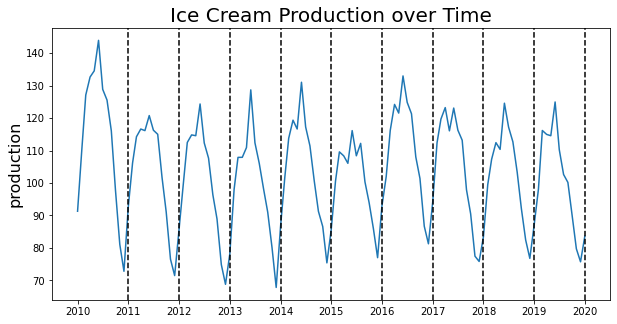

In [8]:
plt.figure(figsize = (10,5))
plt.plot(ice_cream_df)
plt.title("Ice Cream Production over Time", fontsize = 20)
plt.ylabel("production", fontsize = 16)

for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"),color = "k", linestyle = "--")


# ACF Plot

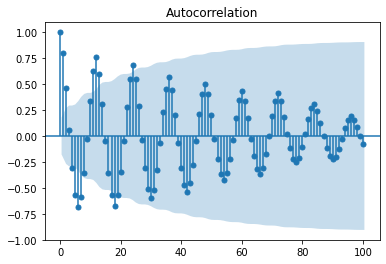

In [9]:
acf_plot = plot_acf(ice_cream_df, lags = 100)

**Based on decaying ACF, we are dealing with Auto Regressive Process**

# PACF Plot

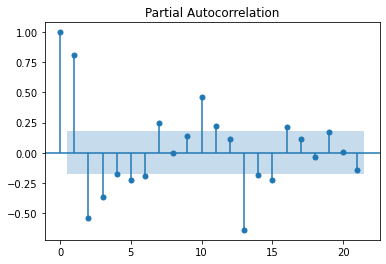

In [10]:
pacf_plot = plot_pacf(ice_cream_df)

### Based on Pacf plot , we should start an Auto Regressive model with lags 1,2,3,13

# Get training and testing data

In [11]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = ice_cream_df[:train_end]
test_data = ice_cream_df[train_end + timedelta(days = 1):test_end]

# Fit the AR Model

In [12]:
#create the model
##we are creating the AR model with lag 3

model = ARMA(train_data, order = (3,0))

In [13]:
#fit the model
start = time()
model_fit = model.fit()
end = time()

print("model fitting time", end - start)

model fitting time 0.5286471843719482


In [14]:
#Summary of the model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             production   No. Observations:                  108
Model:                     ARMA(3, 0)   Log Likelihood                -374.085
Method:                       css-mle   S.D. of innovations              7.642
Date:                Mon, 04 Oct 2021   AIC                            758.170
Time:                        17:23:37   BIC                            771.580
Sample:                    01-01-2010   HQIC                           763.607
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.5743      1.809     57.265      0.000     100.029     107.119
ar.L1.production     1.0469      0.088     11.960      0.000       0.875       1.218
ar.L2.production    -0.0523 

In [15]:
## Get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [16]:
pred_start_date

Timestamp('2019-01-01 00:00:00', freq='MS')

In [17]:
pred_end_date

Timestamp('2019-12-01 00:00:00', freq='MS')

In [18]:
##Get prediction and residuals
pred = model_fit.predict(start = pred_start_date, end = pred_end_date)

residuals = test_data - pred

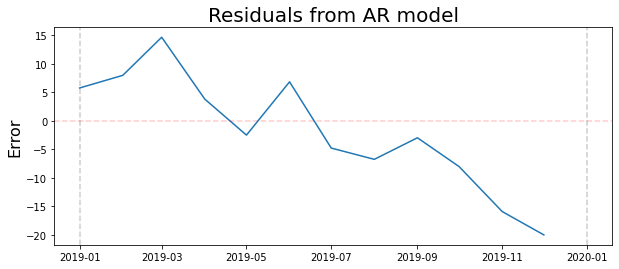

In [19]:
##plot the residuals

plt.figure(figsize = (10,4))
plt.plot(residuals)
plt.title("Residuals from AR model", fontsize = 20)
plt.ylabel("Error", fontsize = 16)
plt.axhline(0,color = "r",linestyle = "--", alpha = 0.2)

for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year) + "-01-01"),color = "k",linestyle = "--", alpha = 0.2)

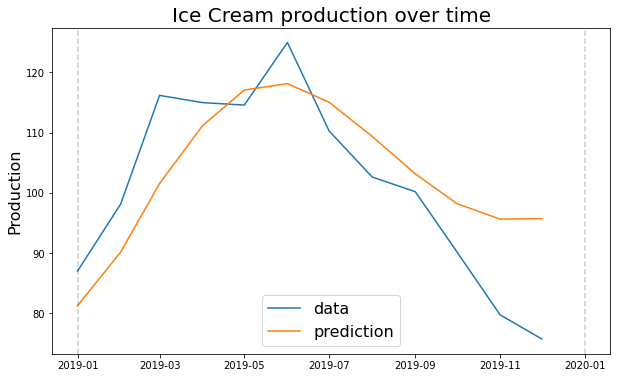

In [20]:
## Plotting the Ice cream production prediction 

plt.figure(figsize = (10,6))

plt.plot(test_data)
plt.plot(pred)

plt.legend(("data", "prediction"), fontsize = 16)

plt.title("Ice Cream production over time", fontsize = 20)
plt.ylabel("Production", fontsize = 16)

for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year) +"-01-01"),color = "k", linestyle = "--",alpha = 0.2)

In [21]:
print("Mean Percentage Absolute error", round(np.mean(abs(residuals/test_data)),4))

Mean Percentage Absolute error 0.0895


In [22]:
print("Root Mean Squared error", np.sqrt(np.mean(residuals**2)))

Root Mean Squared error 9.884059624085518


In [26]:
#Get training and testing set  

train_end = datetime(2016,12,1)
test_end = datetime(2019,12,1)

train_data = ice_cream_df[:train_end]
test_data = ice_cream_df[train_end + timedelta(days = 1): test_end]

# FIt the AR Model for lags 3

In [31]:
#create the model

model = ARMA(train_data, order = (13,0))

In [32]:
#fit the model

start = time()
model_fit = model.fit()
end = time()

print("model Fitting time", end - start)

model Fitting time 60.88656449317932


In [33]:
#Summary of the model

print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             production   No. Observations:                   84
Model:                    ARMA(13, 0)   Log Likelihood                -245.670
Method:                       css-mle   S.D. of innovations              4.094
Date:                Mon, 04 Oct 2021   AIC                            521.340
Time:                        17:36:44   BIC                            557.802
Sample:                    01-01-2010   HQIC                           535.997
                         - 12-01-2016                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               104.0945      2.058     50.591      0.000     100.062     108.127
ar.L1.production      0.8781      0.086     10.240      0.000       0.710       1.046
ar.L2.production      0.

In [34]:
#Get prediction start and end date

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [36]:
#Get prediction and residuals

pred = model_fit.predict(start = pred_start_date, end = pred_end_date)

residuals = test_data - pred

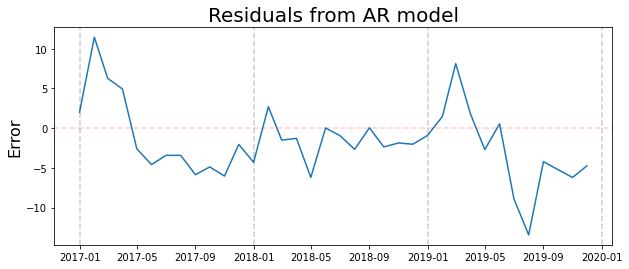

In [39]:
##plot the residuals

plt.figure(figsize = (10,4))
plt.plot(residuals)
plt.title("Residuals from AR model", fontsize = 20)
plt.ylabel("Error", fontsize = 16)
plt.axhline(0,color = "r", linestyle = "--",alpha = 0.2)

for year in range(2017,2021):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), color = "k", linestyle = "--", alpha = 0.2)

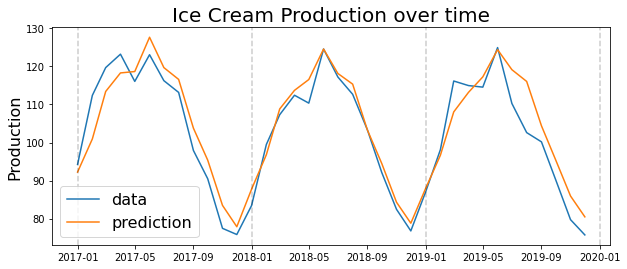

In [40]:
#Plotting the production prediction based on AR model

plt.figure(figsize = (10,4))

plt.plot(test_data)
plt.plot(pred)

plt.legend(("data", "prediction"), fontsize = 16)
plt.title("Ice Cream Production over time", fontsize = 20)
plt.ylabel("Production", fontsize = 16)

for year in range(2017,2021):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), color = "k", linestyle = "--", alpha = 0.2)

In [41]:
print("Mean Percentage Absolute error", round(np.mean(abs(residuals/test_data)),4))

Mean Percentage Absolute error 0.0392


In [43]:
print("Root Mean Squared error", np.sqrt(np.mean(residuals**2)))

Root Mean Squared error 4.95605086383939


## Rolling Forecast origin

**Rolling is a way to turn a single time series into multiple time series, each of them ending one time step than before**

In [2]:
df = pd.read_csv("ice_cream.csv")

In [3]:
df.head(5)

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
